<a href="https://colab.research.google.com/github/SofronovaKA/programming/blob/main/s1_lab05_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
- title: Занятие 5
- ipynb_url: download/s1_lab05.ipynb

# Практическое занятие 5: еще раз про списки
## Цель: Рассмотреть алгоритмы обработки числовых последовательностей с использованием списков **Python**
## Задачи:
1. Свойства и методы списков в **Python**
2. Сортировка вставками
3. Решето Эратосфена
4. Частотный анализ

## Срезы списков
В практическом занятии 3 мы рассмотрели срезы строк. Аналогично срезы работают для списков:

In [ ]:
a = [1, 2, 3, 4, 5]
print(a[1:3])

[2, 3]


In [ ]:
print(a[1:5:2])

[2, 4]


Если не указать первый элемент, то срез будет взят с первого элемента:

In [ ]:
print(a[:3])

[1, 2, 3]


Если не указать последний элемент — срез будет взят до последнего элемента:

In [ ]:
print(a[3:])

[4, 5]


Индексы могут быть отрицательными:

In [ ]:
print(a[:-2])

[1, 2, 3]


Объясните результат выше.

In [ ]:
print(a[-3:])

[3, 4, 5]


Объясните результат выше.

Отрицательным может быть не только индекс, но и шаг:

In [ ]:
print(a[::-1])

[5, 4, 3, 2, 1]


Срез списка представляет собой новый список:

In [ ]:
b = a[-3:-1]
print(a)
print(b)

[1, 2, 3, 4, 5]
[3, 4]


In [ ]:
b[1] = 8
print(a)
print(b)

[1, 2, 3, 4, 5]
[3, 8]


Расположив срез списка слева от оператора присваивания мы можем изменить часть элементов списка:

In [ ]:
a[1:4] = [6, 7, 8]
print(a)

[1, 6, 7, 8, 5]


Та же операция, но с использованием функции `range()`:

In [ ]:
a[1:4] = range(9, 12)
print(a)

[1, 9, 10, 11, 5]


Также можно присвоить в срез значения исходного списка. Например, код ниже осуществляет реверс элементов списка:

In [ ]:
a[::-1] = a[:]
print(a)

[5, 11, 10, 9, 1]


## Методы списков
Помимо методов `append()` и `count()`, рассмотренных в [практическом занятии 3](), существуют и другие [методы списков](https://docs.python.org/3/tutorial/datastructures.html).

Например, метод `insert(i, x)` добавляет новый элемент *x* перед элементом с индексом *i* в список:

In [ ]:
print(a)
a.insert(3, 20)
print(a)

[5, 11, 10, 20, 20, 9, 1]
[5, 11, 10, 20, 20, 20, 9, 1]


### Удаление элемента из списка
Удалить элемент с индексом *i* из списка можно несколькими способами.

С помощью инструкции **del**:

In [ ]:
print(a)
del a[2]
print(a)

[5, 11, 10, 20, 20, 20, 9, 1]
[5, 11, 20, 20, 20, 9, 1]


С помощью метода `pop(i)`:

In [ ]:
print(a)
a.pop(1)
print(a)

[5, 11, 20, 20, 20, 9, 1]
[5, 20, 20, 20, 9, 1]


Если не указать аргумент при вызове метода `pop()`, то будет удален последний элемент:

In [ ]:
print(a)
print(a.pop())
print(a)

[5, 20, 20, 20, 9, 1]
1
[5, 20, 20, 20, 9]


Пример выше также демоснтрирует, что метод `pop()` возвращает значение удаленного из списка элемента.

При использовании списков важно помнить, что наименее трудоемкая операция при удалении элемента — это удаление с конца списка. По возможности, лучше использовать именно ее.

### Добавление нескольких элементов
Добавить несколько элементов в конец списка можно с помощью метода `extend()`, которому в качестве аргумента передается итерируемый объект:

In [ ]:
print(a)
a.extend(range(30, 55, 3))
print(a)

[5, 20, 20, 20, 9]
[5, 20, 20, 20, 9, 30, 33, 36, 39, 42, 45, 48, 51, 54]


Аналогичного результата можно добиться с помощью оператора `+=`:

In [ ]:
print(a)
a += range(55, 60)
print(a)

[5, 20, 20, 20, 9, 30, 33, 36, 39, 42, 45, 48, 51, 54]
[5, 20, 20, 20, 9, 30, 33, 36, 39, 42, 45, 48, 51, 54, 55, 56, 57, 58, 59]


Если при присваивании в срез, длина итерируемого объекта больше среза, то список будет увеличен:

In [ ]:
print(a)
a[-4:-1] = range(60, 66)
print(a)

[5, 20, 20, 20, 9, 30, 33, 36, 39, 42, 45, 48, 51, 54, 55, 56, 57, 58, 59]
[5, 20, 20, 20, 9, 30, 33, 36, 39, 42, 45, 48, 51, 54, 55, 60, 61, 62, 63, 64, 65, 59]


И наоборот, если при присваивании в срез, длина итерируемого объекта меньше среза, то список будет уменьшен:

In [ ]:
print(a)
a[-7:] = range(66, 68)
print(a)

[5, 20, 20, 20, 9, 30, 33, 36, 39, 42, 45, 48, 51, 54, 55, 60, 61, 62, 63, 64, 65, 59]
[5, 20, 20, 20, 9, 30, 33, 36, 39, 42, 45, 48, 51, 54, 55, 66, 67]


В частности, при помощи присваивания в срез можно удалить часть списка, если присвоить в срез пустую последовательность:

In [ ]:
print(a)
a[0:6] = []
print(a)

[5, 20, 20, 20, 9, 30, 33, 36, 39, 42, 45, 48, 51, 54, 55, 66, 67]
[33, 36, 39, 42, 45, 48, 51, 54, 55, 66, 67]


## Сортировка списков
В [практическом занятии 3]() мы рассмотрели сортировку списков в **Python** с помощью функций `sort()` и `sorted()` (используют сортировку *TimSort*). На этом занятии мы рассмотрим "ручную" сортировку с помощью алгоритма *сортировки вставками*.

### Сортировка вставками
На каждой итерации алгоритма сортировки вставками выполняется сортировка только первых i элементов списка *a*. Пусть уже первые i − 1 элементов списка *a* отсортированы (то есть срез ``a[:i]`` отсортирован), и мы добавили в конец новый элемент. Этот новый элемент ``a[i]`` нужно передвинуть на правильное место, чтобы снова получить отсортированный массив. Будем просто пытаться обменивать его местами с соседом слева, если этот сосед больше нового элемента.

Например, пусть i = 7 и срез ``a[:i] равен [42, 45, 54, 55, 66, 67]``, а значение ``a[i]`` равно 48. Тогда элемент ``a[i]`` нужно поставить после элемента ``a[1]``, равного 45, а все элементы, которые больше 48, сдвинуть вправо на 1. Получится cрез ``a[:i+1], равный [42, 45, 48, 51, 54, 55, 66, 67]``. Таким образом, при вставке элемента ``a[i]`` в срез ``a[:i]`` так, чтобы в результате получился упорядоченный срез, все элементы, которые больше ``a[i]`` будут двигаться вправо на одну позицию. А в освободившуюся позицию и будет вставлен элемент ``a[i]``.
При этом значение ``a[i]`` нужно сохранить в переменной, т. к. на место элемента ``a[i]``, возможно, будет записан элемент ``a[i–1]``.

Получим следующий алгоритм:

In [ ]:
a = [66, 54, 42, 45, 51, 55, 67, 48]
for i in range(1, len(a)):
    vrem = a[i] # сохраним текущий элемент во временной переменной
    j = i - 1
    # определяем элементы большие vrem
    while j >= 0 and a[j] > vrem:
        # сдвигаем вправо на 1
        a[j+1] = a[j]
        j -= 1
    # На свободное место записываем vrem
    a[j+1] = vrem
print(a)

[42, 45, 48, 51, 54, 55, 66, 67]


## Решето Эратосфена
При решении практических задач часто возникает необходимость поиска простых чисел не превосходящих натурального числа N. Проверка всех чисел от 2 до N на простоту с помощью алгоритма, рассмотренного на [практическом занятии 2]() не является эффективным — ассимптотическая сложность такого подхода равна $O(n*\sqrt{n})$.

Более эффективным является алгоритм, предложенный греческим математиком Эратосфеном Киренским, согласно ему необходимо:
1. Выписать все числа от 2 до N;
2. Начать с n = 2;
3. Вычеркнуть все числа, кратные n: 2n, 3n, и т.д.;
4. Найти следующее невычеркнутой число и присвоить его переменной n;
5. Повторять шаги 3 и 4 до тех пор, пока n < N.

Для N = 10 алгоритм будет выглядеть следующим образом:
1. 2 3 4 5 6 7 8 9 10
2. 2 3 ~~4~~~ 5 ~~6~~ 7 ~~8~~ 9 ~~10~~
3. 2 3 ~~4~~~ 5 ~~6~~ 7 ~~8~~ ~~9~~ ~~10~~
4. Чисел кратных 5 и 7 не осталось и в итоге получим список простых чисел: 2, 3, 5 и 7

Заметим, что при вычеркивании чисел, кратных `3` число `6` оказалось вычеркнутым ранее (оно кратно двум — `3*2`). Этот факт позволяет улучшить алгоритм, начиная вычеркивать числа на шаге *3* не с `2n`, а с $n^2$. При этом получится, что при $n^2 > N$ вычеркивать будет нечего, что мы и увидели для чисел `5` и `7` в примере выше.

С учетом сказанного, алгоритм примет следующий вид:

1. Выписать все числа от 2 до N;
2. Начать с n = 2;
3. Вычеркнуть все числа, кратные n, начиная с  $n^2$;
4. Найти следующее невычеркнутой число и присвоить его переменной n;
5. Повторять шаги 3 и 4 до тех пор, пока $n^2 \leq N$.

Реалдизация алгоритма на языке **Python** будет выглядеть следующим образом.

Пусть переменная `N` содержит исходное число, а массив `a` — инициирован значениями `True`. Далее для числа `i` его элемент `a[i]` будет содержать значение `False`, если число `i` вычеркнуто.  

In [ ]:
N = int(input())
a = [True] * (N + 1)

10


Элементы `a[0]` и `a[1]` сразу заполним значением `False`:

In [ ]:
a[0] = False
a[1] = False

Строки ниже реализуют шаги со 2 по 5 из приведенного выше алгоритма:

In [ ]:
n = 2
while n*n <= N:
    if a[n]:
        i = n*n
        while i <= N:
            a[i] = False
            i += n
    n += 1

Выведем полученную последовательность простых чисел:

In [ ]:
for i in range(2, N+1):
    if a[i]:
        print(i, end=' ')

2 3 5 7 

## Задача частотного анализа


**Задача:**
На вход программы подается текст на английском языке, заканчивающийся
точкой (другие символы “.” в тексте отсутствуют). Требуется написать
программу, которая будет определять и выводить на экран английскую
букву, встречающуюся в этом тексте чаще всего, и количество там таких
букв. Строчные и прописные буквы при этом считаются не различимыми.
Если искомых букв несколько, то программа должна выводить на экран
первую из них по алфавиту. Например, пусть файл содержит следующую
запись:
     It is not a simple task. Yes!
Чаще всего здесь встречаются буквы I, S и T (слово Yes в подсчете не
учитывается, так как расположено после точки). Следовательно, в данном
случае программа должна вывести два символа, разделенных пробелом:
I 3

Для работы алгоритма ниже потребуется файл `text.txt`. [download file text.txt]()

In [44]:
from google.colab import files

uploaded = files.upload()  # Откроется окно выбора файла

Saving text-data.txt to text-data.txt


In [31]:
# Определим список заглавных английских букв
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# Определим список частоты встречающихся букв в предложении
cnt = [0]*len(letters)

with open('text.txt', 'r') as F:
    s = F.readline().split('.')[0].upper() # выделим предложение, переведя все символы в верхний регистр
    for c in s:
        # подсчет частоты встречающихся букв
        if c in letters:
            cnt[letters.index(c)] += 1
# Выведем результат
print(letters[cnt.index(max(cnt))], max(cnt))


I 3


## **Задание 1.**  
Модифицируйте код приведенный выше так, чтобы в результате на экран выводились 10 наиболее встречаемых букв и их частоты (в порядке убывания).

In [36]:
# Определим список заглавных английских букв
letters = [chr(i) for i in range(65, 91)] # Генерация списка букв A-Z

# Определим список частоты встречающихся букв в предложении
cnt = [0] * len(letters)

# Открываем файл и анализируем текст
with open ('text.txt', 'r') as F:
  s = F. readline(). split('.')[0]. upper() # Выделяем предложение и переводим в верхний регистр
  for c in s:
    if c in letters:
      cnt [letters.index (c)] += 1 # Подсчет частоты встречающихся букв

# Создаем список пар (буква, частота) и сортируем его по убыванию частоты
sorted_letters = sorted (zip(letters, cnt), key=lambda x: x[1], reverse=True)

# Выводим 10 наиболее встречающихся букв
for letter, frequency in sorted_letters[:10]:
  print(letter, frequency)

I 3
S 3
T 3
A 2
E 1
K 1
L 1
M 1
N 1
O 1


## **Задание 2.**

Модифицируйте код из предыдущего задания чтобы он анализировал все предложения из исходного текста и проведите частотный анализ разделов History и Academic reputation статьи https://en.wikipedia.org/wiki/Moscow_City_University. Сравните полученные результаты.

Вывести:

- **Топ-10** самых частых букв для раздела *History*.
- **Топ-10** самых частых букв для раздела *Academic reputation*.
- Сравнительную таблицу частот всех букв между разделами.

In [41]:
def analyze_section(text):
    # Определим список заглавных английских букв
    letters = [chr(i) for i in range(65, 91)]  # Генерация списка букв A-Z

    # Определим список частоты встречающихся букв
    cnt = [0] * len(letters)

    # Переводим весь текст в верхний регистр
    text = text.upper()

    # Подсчитываем частоту каждой буквы во всех предложениях
    for c in text:
        if c in letters:
            cnt[letters.index(c)] += 1

    # Создаем список пар (буква, частота) и сортируем его по убыванию частоты
    sorted_letters = sorted(zip(letters, cnt), key=lambda x: x[1], reverse=True)

    return sorted_letters

def print_analysis(section_name, sorted_letters):
    print(f"\nAnalysis for {section_name} section:")
    print("Top 10 most frequent letters:")
    for letter, frequency in sorted_letters[:10]:
        print(f"{letter}: {frequency}")

In [53]:
from google.colab import files

uploaded = files.upload()  # Откроется окно выбора файла

Saving new_text.txt to new_text.txt


In [52]:
!ls

 frequency_comparison.png   sample_data  'text (1).txt'


In [51]:
!rm text.txt

In [45]:
# Разделяем текст на секции
with open('text-data.txt', 'r') as file:
    text = file.read()

sections = text.split('###')[1:]  # Пропускаем пустой элемент в начале
history_section = sections[0].strip()
academic_section = sections[1].strip()

# Анализируем каждую секцию
history_analysis = analyze_section(history_section)
academic_analysis = analyze_section(academic_section)

# Выводим результаты
print_analysis("History", history_analysis)
print_analysis("Academic reputation", academic_analysis)

# Сравнение результатов
print("\n Сравнение частот букв между разделами:")
history_dict = dict(history_analysis)
academic_dict = dict(academic_analysis)

for letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
    history_freq = history_dict.get(letter, 0)
    academic_freq = academic_dict.get(letter, 0)
    if history_freq > 0 or academic_freq > 0:
        print(f"Letter {letter}: History: {history_freq}, Academic: {academic_freq}")

Analysis for History section:
Top 10 most frequent letters:
E: 160
T: 141
I: 120
O: 114
N: 106
A: 104
S: 103
R: 67
D: 55
C: 54
Analysis for Academic reputation section:
Top 10 most frequent letters:
S: 19
I: 18
E: 15
R: 14
T: 13
N: 12
A: 11
U: 7
B: 6
Y: 6

 Сравнение частот букв между разделами:
Letter A: History: 104, Academic: 11
Letter B: History: 14, Academic: 6
Letter C: History: 54, Academic: 4
Letter D: History: 55, Academic: 3
Letter E: History: 160, Academic: 15
Letter F: History: 33, Academic: 1
Letter G: History: 31, Academic: 3
Letter H: History: 51, Academic: 4
Letter I: History: 120, Academic: 18
Letter J: History: 3, Academic: 0
Letter K: History: 2, Academic: 4
Letter L: History: 39, Academic: 1
Letter M: History: 38, Academic: 2
Letter N: History: 106, Academic: 12
Letter O: History: 114, Academic: 5
Letter P: History: 25, Academic: 1
Letter Q: History: 0, Academic: 1
Letter R: History: 67, Academic: 14
Letter S: History: 103, Academic: 19
Letter T: History: 141, Acade

Analysis for History section:
Top 10 most frequent letters:
E: 160
T: 141
I: 120
O: 114
N: 106
A: 104
S: 103
R: 67
D: 55
C: 54
Analysis for Academic reputation section:
Top 10 most frequent letters:
S: 19
I: 18
E: 15
R: 14
T: 13
N: 12
A: 11
U: 7
B: 6
Y: 6


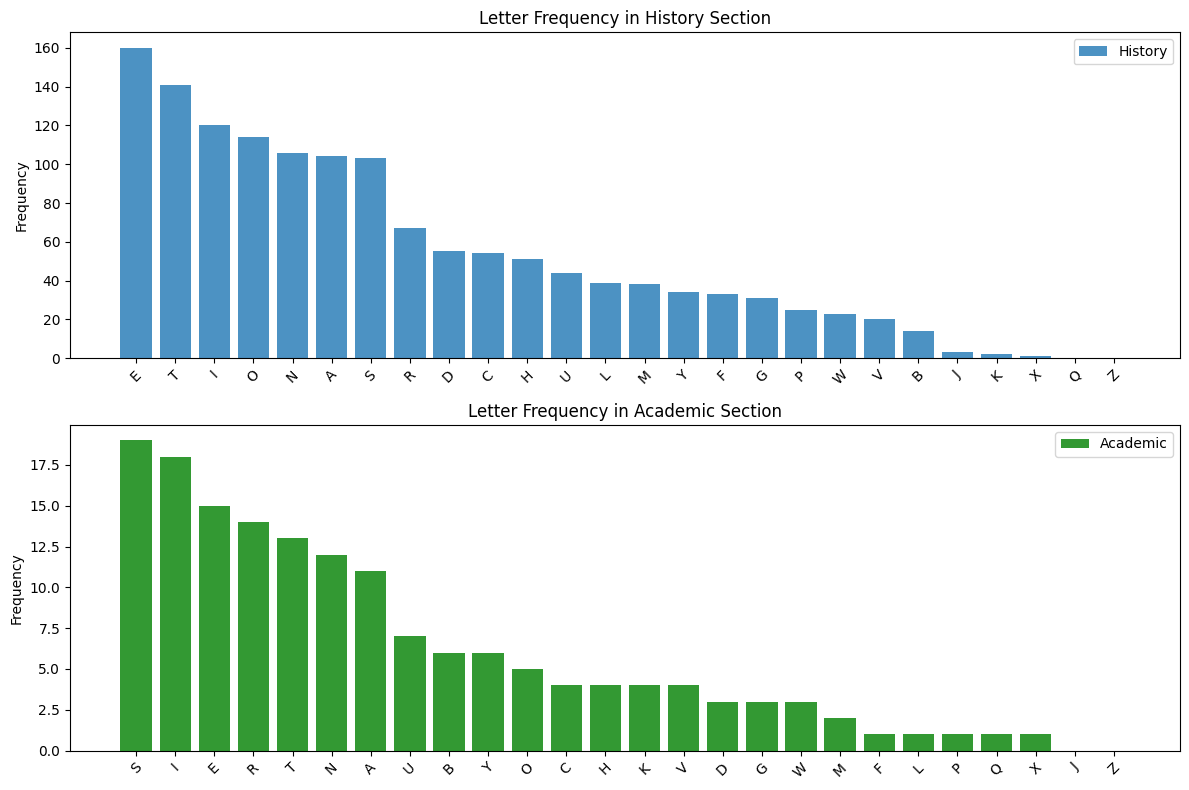

Comparison of letter frequencies between sections:
Letter A: History: 104, Academic: 11
Letter B: History: 14, Academic: 6
Letter C: History: 54, Academic: 4
Letter D: History: 55, Academic: 3
Letter E: History: 160, Academic: 15
Letter F: History: 33, Academic: 1
Letter G: History: 31, Academic: 3
Letter H: History: 51, Academic: 4
Letter I: History: 120, Academic: 18
Letter J: History: 3, Academic: 0
Letter K: History: 2, Academic: 4
Letter L: History: 39, Academic: 1
Letter M: History: 38, Academic: 2
Letter N: History: 106, Academic: 12
Letter O: History: 114, Academic: 5
Letter P: History: 25, Academic: 1
Letter Q: History: 0, Academic: 1
Letter R: History: 67, Academic: 14
Letter S: History: 103, Academic: 19
Letter T: History: 141, Academic: 13
Letter U: History: 44, Academic: 7
Letter V: History: 20, Academic: 4
Letter W: History: 23, Academic: 3
Letter X: History: 1, Academic: 1
Letter Y: History: 34, Academic: 6


In [46]:
import matplotlib.pyplot as plt
import numpy as np

def analyze_section(text):
    letters = [chr(i) for i in range(65, 91)]
    cnt = [0] * len(letters)
    text = text.upper()

    for c in text:
        if c in letters:
            cnt[letters.index(c)] += 1

    sorted_letters = sorted(zip(letters, cnt), key=lambda x: x[1], reverse=True)
    return sorted_letters

def print_analysis(section_name, sorted_letters):
    print(f"\
Analysis for {section_name} section:")
    print("Top 10 most frequent letters:")
    for letter, frequency in sorted_letters[:10]:
        print(f"{letter}: {frequency}")

def visualize_comparison(history_analysis, academic_analysis):
    # Создаем фигуру с двумя подграфиками
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

    # Преобразуем данные для визуализации
    history_letters, history_freq = zip(*history_analysis)
    academic_letters, academic_freq = zip(*academic_analysis)

    # Создаем позиции для столбцов
    x = np.arange(len(history_letters))

    # Построение графиков
    ax1.bar(x, history_freq, align='center', alpha=0.8, label='History')
    ax1.set_title('Letter Frequency in History Section')
    ax1.set_xticks(x)
    ax1.set_xticklabels(history_letters)

    ax2.bar(x, academic_freq, align='center', alpha=0.8, color='green', label='Academic')
    ax2.set_title('Letter Frequency in Academic Section')
    ax2.set_xticks(x)
    ax2.set_xticklabels(academic_letters)

    # Поворачиваем подписи букв для лучшей читаемости
    for label in ax1.get_xticklabels():
        label.set_rotation(45)
    for label in ax2.get_xticklabels():
        label.set_rotation(45)

    # Добавляем подписи осей
    ax1.set_ylabel('Frequency')
    ax2.set_ylabel('Frequency')

    # Добавляем легенду
    ax1.legend()
    ax2.legend()

    # Настраиваем расположение графиков
    plt.tight_layout()

    # Показываем график
    plt.show()

# Анализируем текст
with open('text-data.txt', 'r') as file:
    text = file.read()

sections = text.split('###')[1:]
history_section = sections[0].strip()
academic_section = sections[1].strip()

# Проводим анализ
history_analysis = analyze_section(history_section)
academic_analysis = analyze_section(academic_section)

# Выводим текстовый анализ
print_analysis("History", history_analysis)
print_analysis("Academic reputation", academic_analysis)

# Визуализируем результаты
visualize_comparison(history_analysis, academic_analysis)

# Сравнение результатов
print("\
Comparison of letter frequencies between sections:")
history_dict = dict(history_analysis)
academic_dict = dict(academic_analysis)

for letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
    history_freq = history_dict.get(letter, 0)
    academic_freq = academic_dict.get(letter, 0)
    if history_freq > 0 or academic_freq > 0:
        print(f"Letter {letter}: History: {history_freq}, Academic: {academic_freq}")

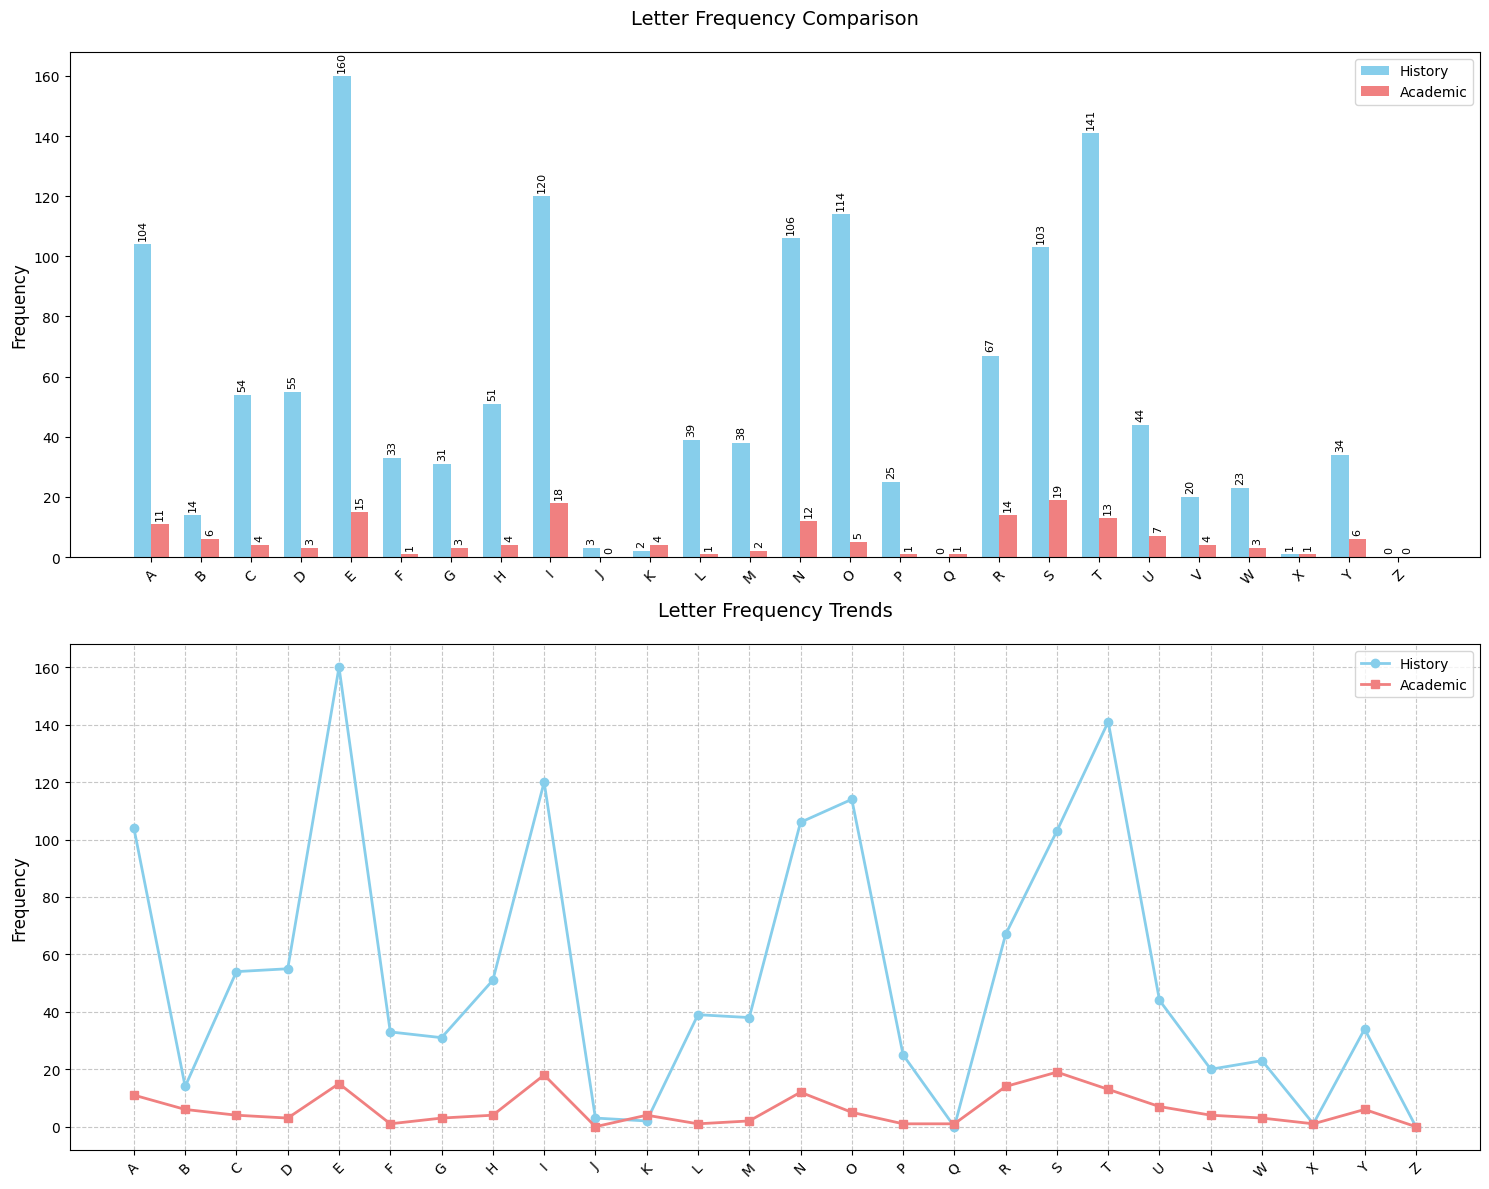

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

def visualize_comparison(history_analysis, academic_analysis):
    # Преобразуем результаты анализа в словари для удобства
    history_dict = dict(history_analysis)
    academic_dict = dict(academic_analysis)

    # Получаем все уникальные буквы
    letters = sorted(set(list(history_dict.keys()) + list(academic_dict.keys())))

    # Подготавливаем данные для графика
    history_freq = [history_dict.get(letter, 0) for letter in letters]
    academic_freq = [academic_dict.get(letter, 0) for letter in letters]

    # Настраиваем параметры графика
    x = np.arange(len(letters))
    width = 0.35

    # Создаем фигуру большего размера и с белым фоном
    plt.style.use('default')
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), facecolor='white')

    # График столбцов
    rects1 = ax1.bar(x - width/2, history_freq, width, label='History', color='skyblue')
    rects2 = ax1.bar(x + width/2, academic_freq, width, label='Academic', color='lightcoral')

    ax1.set_ylabel('Frequency', fontsize=12)
    ax1.set_title('Letter Frequency Comparison', fontsize=14, pad=20)
    ax1.set_xticks(x)
    ax1.set_xticklabels(letters)
    ax1.legend(fontsize=10)
    ax1.set_facecolor('white')

    # Добавляем числовые значения над столбцами
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax1.annotate(f'{int(height)}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', rotation=90,
                        fontsize=8)

    autolabel(rects1)
    autolabel(rects2)

    # График линий для сравнения трендов
    ax2.plot(x, history_freq, marker='o', label='History', color='skyblue', linewidth=2)
    ax2.plot(x, academic_freq, marker='s', label='Academic', color='lightcoral', linewidth=2)
    ax2.set_ylabel('Frequency', fontsize=12)
    ax2.set_title('Letter Frequency Trends', fontsize=14, pad=20)
    ax2.set_xticks(x)
    ax2.set_xticklabels(letters)
    ax2.legend(fontsize=10)
    ax2.set_facecolor('white')

    # Добавляем сетку для лучшей читаемости
    ax2.grid(True, linestyle='--', alpha=0.7)

    # Поворачиваем подписи букв для лучшей читаемости
    for ax in [ax1, ax2]:
        ax.tick_params(axis='x', rotation=45)

    # Настраиваем layout
    plt.tight_layout()

    # Сохраняем график
    plt.savefig('frequency_comparison.png', dpi=300, bbox_inches='tight')

    # Отображаем график в Colab
    plt.show()

    # Скачиваем файл
    files.download('frequency_comparison.png')

# Анализируем текст
with open('text-data.txt', 'r') as file:
    text = file.read()

sections = text.split('###')[1:]  # Пропускаем пустой элемент в начале
history_section = sections[0].strip()
academic_section = sections[1].strip()

# Проводим анализ
history_analysis = analyze_section(history_section)
academic_analysis = analyze_section(academic_section)

# Визуализируем результаты
visualize_comparison(history_analysis, academic_analysis)

In [70]:
from google.colab import files

uploaded = files.upload()  # Откроется окно выбора файла

Saving text-data.txt to text-data.txt


In [71]:
# Разделяем текст на секции
with open('text-data.txt', 'r') as file:
    text = file.read()

sections = text.split('###')[1:]  # Пропускаем пустой элемент в начале
history_section = sections[0].strip()
academic_section = sections[1].strip()

# Анализируем каждую секцию
history_analysis = analyze_section(history_section)
academic_analysis = analyze_section(academic_section)

# Выводим результаты
print_analysis("History", history_analysis)
print_analysis("Academic reputation", academic_analysis)

# Сравнение результатов
print("\n Сравнение частот букв между разделами:")
history_dict = dict(history_analysis)
academic_dict = dict(academic_analysis)

for letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
    history_freq = history_dict.get(letter, 0)
    academic_freq = academic_dict.get(letter, 0)
    if history_freq > 0 or academic_freq > 0:
        print(f"Letter {letter}: History: {history_freq}, Academic: {academic_freq}")

Analysis for History section:
Top 10 most frequent letters:
E: 492
S: 416
O: 289
N: 288
A: 270
I: 268
T: 267
R: 232
C: 197
P: 133
Analysis for Academic reputation section:
Top 10 most frequent letters:
E: 276
O: 210
T: 182
N: 173
I: 170
S: 166
A: 140
R: 136
C: 107
M: 78

 Сравнение частот букв между разделами:
Letter A: History: 270, Academic: 140
Letter B: History: 51, Academic: 30
Letter C: History: 197, Academic: 107
Letter D: History: 124, Academic: 51
Letter E: History: 492, Academic: 276
Letter F: History: 76, Academic: 76
Letter G: History: 75, Academic: 44
Letter H: History: 95, Academic: 60
Letter I: History: 268, Academic: 170
Letter J: History: 6, Academic: 3
Letter K: History: 7, Academic: 13
Letter L: History: 115, Academic: 70
Letter M: History: 115, Academic: 78
Letter N: History: 288, Academic: 173
Letter O: History: 289, Academic: 210
Letter P: History: 133, Academic: 66
Letter Q: History: 5, Academic: 3
Letter R: History: 232, Academic: 136
Letter S: History: 416, Aca

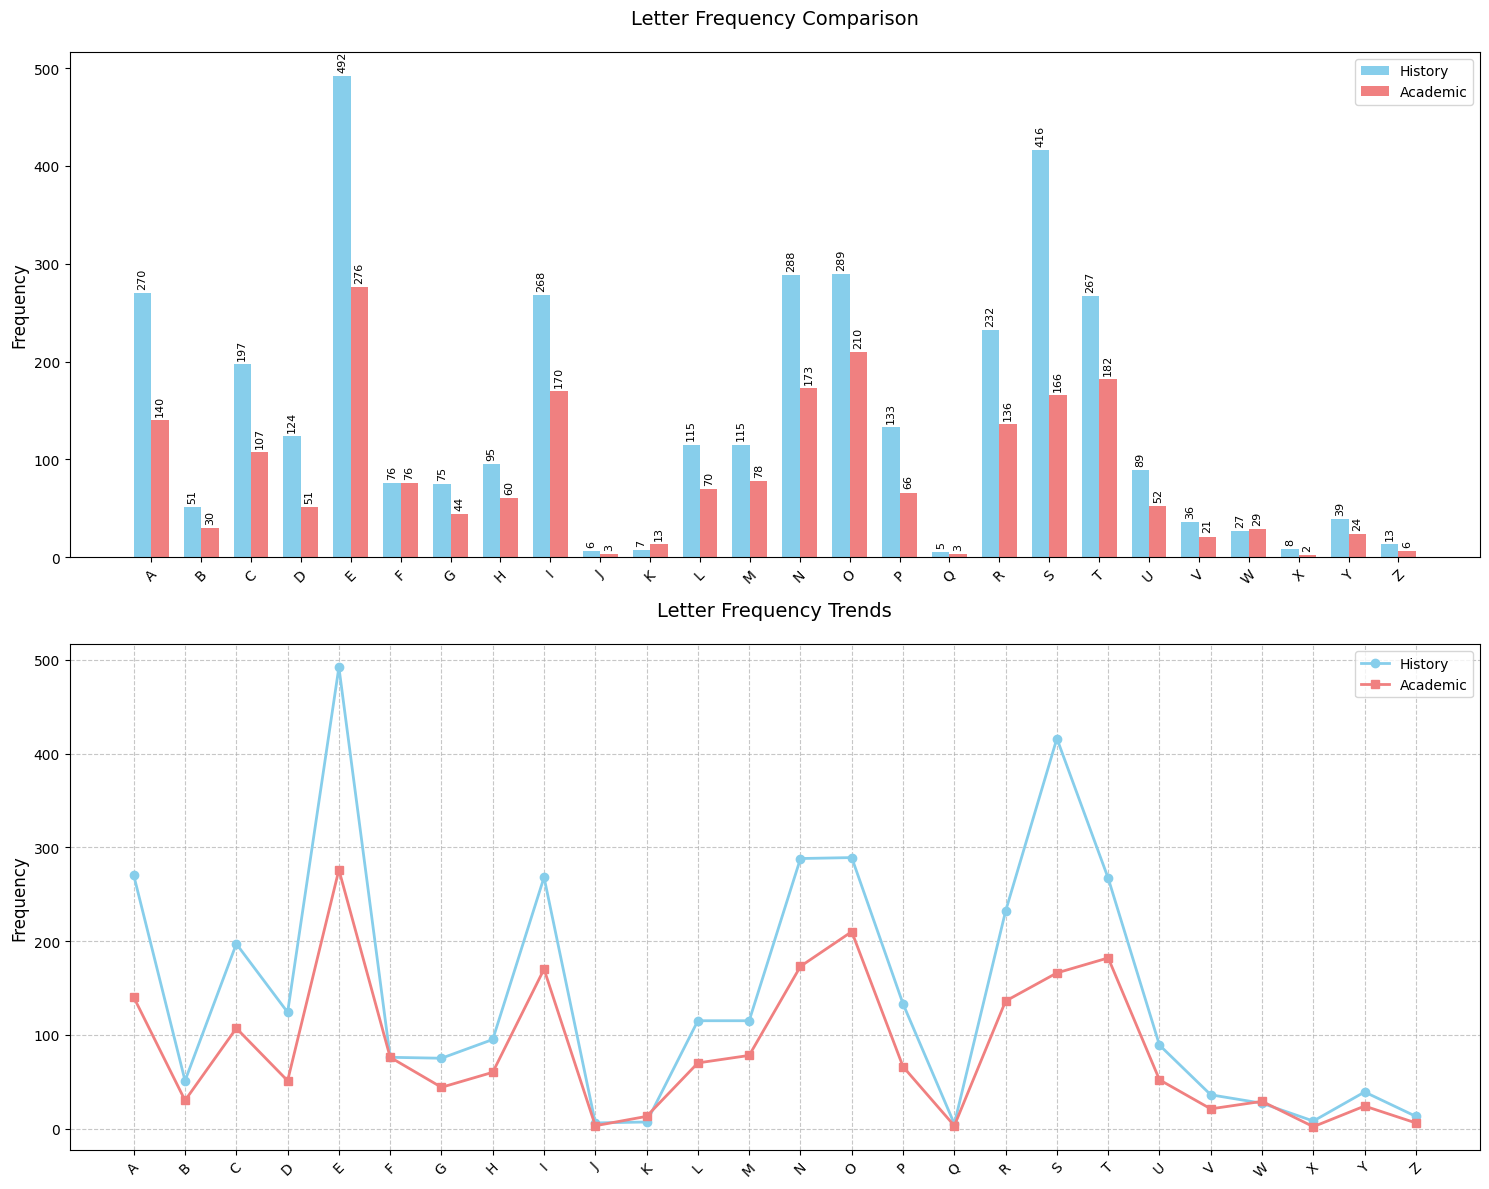

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

def visualize_comparison(history_analysis, academic_analysis):
    # Преобразуем результаты анализа в словари для удобства
    history_dict = dict(history_analysis)
    academic_dict = dict(academic_analysis)

    # Получаем все уникальные буквы
    letters = sorted(set(list(history_dict.keys()) + list(academic_dict.keys())))

    # Подготавливаем данные для графика
    history_freq = [history_dict.get(letter, 0) for letter in letters]
    academic_freq = [academic_dict.get(letter, 0) for letter in letters]

    # Настраиваем параметры графика
    x = np.arange(len(letters))
    width = 0.35

    # Создаем фигуру большего размера и с белым фоном
    plt.style.use('default')
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), facecolor='white')

    # График столбцов
    rects1 = ax1.bar(x - width/2, history_freq, width, label='History', color='skyblue')
    rects2 = ax1.bar(x + width/2, academic_freq, width, label='Academic', color='lightcoral')

    ax1.set_ylabel('Frequency', fontsize=12)
    ax1.set_title('Letter Frequency Comparison', fontsize=14, pad=20)
    ax1.set_xticks(x)
    ax1.set_xticklabels(letters)
    ax1.legend(fontsize=10)
    ax1.set_facecolor('white')

    # Добавляем числовые значения над столбцами
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax1.annotate(f'{int(height)}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', rotation=90,
                        fontsize=8)

    autolabel(rects1)
    autolabel(rects2)

    # График линий для сравнения трендов
    ax2.plot(x, history_freq, marker='o', label='History', color='skyblue', linewidth=2)
    ax2.plot(x, academic_freq, marker='s', label='Academic', color='lightcoral', linewidth=2)
    ax2.set_ylabel('Frequency', fontsize=12)
    ax2.set_title('Letter Frequency Trends', fontsize=14, pad=20)
    ax2.set_xticks(x)
    ax2.set_xticklabels(letters)
    ax2.legend(fontsize=10)
    ax2.set_facecolor('white')

    # Добавляем сетку для лучшей читаемости
    ax2.grid(True, linestyle='--', alpha=0.7)

    # Поворачиваем подписи букв для лучшей читаемости
    for ax in [ax1, ax2]:
        ax.tick_params(axis='x', rotation=45)

    # Настраиваем layout
    plt.tight_layout()

    # Сохраняем график
    plt.savefig('frequency_comparison.png', dpi=300, bbox_inches='tight')

    # Отображаем график в Colab
    plt.show()

    # Скачиваем файл
    files.download('frequency_comparison.png')

# Анализируем текст
with open('text-data.txt', 'r') as file:
    text = file.read()

sections = text.split('###')[1:]  # Пропускаем пустой элемент в начале
history_section = sections[0].strip()
academic_section = sections[1].strip()

# Проводим анализ
history_analysis = analyze_section(history_section)
academic_analysis = analyze_section(academic_section)

# Визуализируем результаты
visualize_comparison(history_analysis, academic_analysis)

### Индивидуальное задание

## Общая формулировка задания для всех вариантов:

Модифицируйте код из предыдущего задания чтобы он анализировал все предложения из исходного текста и проведите частотный анализ указанных разделов статьи. Сравните полученные результаты.

Необходимо вывести:
1. Топ-10 самых частых букв для первого указанного раздела
2. Топ-10 самых частых букв для второго указанного раздела
3. Сравнительную таблицу частот всех букв между разделами

## Варианты заданий:

### **Вариант 1**
**Статья:** Business informatics

**Разделы:** Introduction, Applications

**Ссылка:** https://en.wikipedia.org/wiki/Business_informatics

### **Вариант 2**
**Статья:** Enterprise resource planning

**Разделы:** History, Components

**Ссылка:** https://en.wikipedia.org/wiki/Enterprise_resource_planning


### **Вариант 3**
**Статья:** Business intelligence

**Разделы:** Definition, Functions

**Ссылка:** https://en.wikipedia.org/wiki/Business_intelligence


### **Вариант 4**
**Статья:** Data mining

**Разделы:** Process, Standards

**Ссылка:** https://en.wikipedia.org/wiki/Data_mining


### **Вариант 5**
**Статья:** Business process management

**Разделы:** Overview, Activities

**Ссылка:** https://en.wikipedia.org/wiki/Business_process_management


### **Вариант 6**
**Статья:** Information system

**Разделы:** Types, Components

**Ссылка:** https://en.wikipedia.org/wiki/Information_system


### **Вариант 7**
**Статья:** Knowledge management

**Разделы:** History, Strategies

**Ссылка:** https://en.wikipedia.org/wiki/Knowledge_management


### **Вариант 8**
**Статья:** Business analytics

**Разделы:** Applications, Methods

**Ссылка:** https://en.wikipedia.org/wiki/Business_analytics


### Вариант 9
**Статья:** Digital transformation

**Разделы:** Definition, Impact

**Ссылка:** https://en.wikipedia.org/wiki/Digital_transformation

### Вариант 10
**Статья:** Cloud computing

**Разделы:** Architecture, Service models

**Ссылка:** https://en.wikipedia.org/wiki/Cloud_computing

### Вариант 11
**Статья:** Big data

**Разделы:** Definition, Characteristics

**Ссылка:** https://en.wikipedia.org/wiki/Big_data

### Вариант 12
**Статья:** Database management system

**Разделы:** History, Features

**Ссылка:** https://en.wikipedia.org/wiki/Database_management_system\n\n

### Вариант 13
**Статья:** Customer relationship management

**Разделы:** Types, Implementation

**Ссылка:** https://en.wikipedia.org/wiki/Customer_relationship_management

### Вариант 14
**Статья:** Supply chain management

**Разделы:** Activities, Development

**Ссылка:** https://en.wikipedia.org/wiki/Supply_chain_management

### Вариант 15
**Статья:** Electronic data interchange

**Разделы:** Standards, Benefits

**Ссылка:** https://en.wikipedia.org/wiki/Electronic_data_interchange

### Вариант 16
**Статья:** Information technology management

**Разделы:** Functions, Challenges

**Ссылка:** https://en.wikipedia.org/wiki/Information_technology_management

### Вариант 17
**Статья:** Business process modeling

**Разделы:** Methods, Applications

**Ссылка:** https://en.wikipedia.org/wiki/Business_process_modeling

### Вариант 18
**Статья:** Data warehouse

**Разделы:** Architecture, Implementation

**Ссылка:** https://en.wikipedia.org/wiki/Data_warehouse

### Вариант 19
**Статья:** Systems analysis
**Разделы:** Overview, Techniques
**Ссылка:** https://en.wikipedia.org/wiki/Systems_analysis

### Вариант 20
**Статья:** Digital economy

**Разделы:** Characteristics, Impact

**Ссылка:** https://en.wikipedia.org/wiki/Digital_economy

### Вариант 21
**Статья:** Enterprise architecture

**Разделы:** Frameworks, Benefits

**Ссылка:** https://en.wikipedia.org/wiki/Enterprise_architecture

### Вариант 22
**Статья:** Information security

**Разделы:** Principles, Methods

**Ссылка:** https://en.wikipedia.org/wiki/Information_security

### Вариант 23
**Статья:** Project management

**Разделы:** Approaches, Processes

**Ссылка:** https://en.wikipedia.org/wiki/Project_management

### Вариант 24
**Статья:** Business model

**Разделы:** Components, Types

**Ссылка:** https://en.wikipedia.org/wiki/Business_model

### Вариант 25
**Статья:** Information technology

**Разделы:** History, Applications

**Ссылка:** https://en.wikipedia.org/wiki/Information_technology

### Вариант 26
**Статья:** Data analysis

**Разделы:** Methods, Tools

**Ссылка:** https://en.wikipedia.org/wiki/Data_analysis

### Вариант 27
**Статья:** Business process automation

**Разделы:** Benefits, Implementation

**Ссылка:** https://en.wikipedia.org/wiki/Business_process_automation

### Вариант 28
**Статья:** Digital marketing

**Разделы:** Channels, Strategies

**Ссылка:** https://en.wikipedia.org/wiki/Digital_marketing


### Вариант 29
**Статья:** Machine learning

**Разделы:** Applications, Methods

**Ссылка:** https://en.wikipedia.org/wiki/Machine_learning

### Вариант 30
**Статья:** Artificial intelligence in business

**Разделы:** Implementation, Impact

**Ссылка:** https://en.wikipedia.org/wiki/Artificial_intelligence_in_business

